In [1]:
# just as shown in https://keras.io/api/preprocessing/image/

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
tf.keras.preprocessing.image_dataset_from_directory(
    '../../data_individual_converted/',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(300, 300),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False
)

Found 669 files belonging to 2 classes.


<BatchDataset shapes: ((None, 300, 300, 1), (None,)), types: (tf.float32, tf.int32)>

In [40]:
image_path = '../../data_individual_converted/par1/par1b1_s_001.jpg'

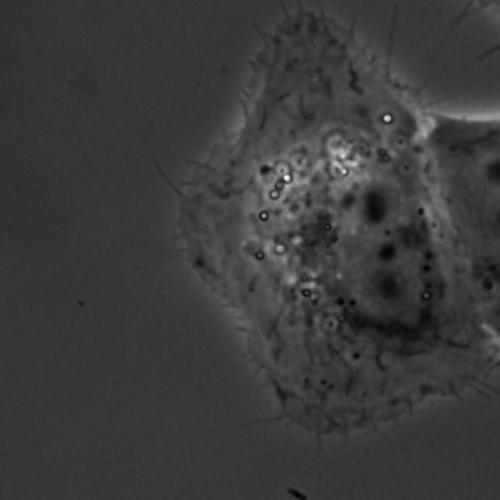

In [44]:
image_test = tf.keras.preprocessing.image.load_img(
    image_path, color_mode="grayscale", target_size=None, interpolation="nearest"
)
image_test

In [46]:
type(image_test)

PIL.JpegImagePlugin.JpegImageFile

In [48]:
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = keras.preprocessing.image.img_to_array(image)
print('checkpoint1 : ',  input_arr.shape)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print('checkpoint2 : ', input_arr.shape)
# predictions = model.predict(input_arr)

checkpoint1 :  (500, 500, 3)
checkpoint2 :  (1, 500, 500, 3)


In [49]:
type(input_arr)

numpy.ndarray

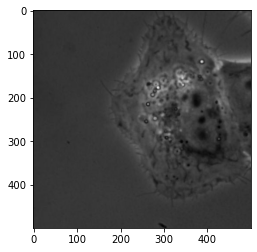

In [52]:
input_arr_test = np.squeeze(input_arr)
input_arr_test=input_arr_test/255
plt.imshow(input_arr_test)

In [57]:
# Converts a PIL Image instance to a Numpy array.
image_array = tf.keras.preprocessing.image.img_to_array(image, data_format=None, dtype=None)
image_array.shape

(500, 500, 3)

In [55]:
type(image_array)

numpy.ndarray

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 40s 0us/step


In [11]:
print('x_train shape: ' , x_train.shape)
print('y_train shape: ' , y_train.shape)
print('x_test shape: ' , x_test.shape)
print('y_test shape: ' , y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [12]:
type(x_train)  # maybe this works to make dataset object into np array?

numpy.ndarray

In [13]:
type(y_train)

numpy.ndarray

In [15]:
!pip install np_utils

     |████████████████████████████████| 61 kB 3.0 MB/s eta 0:00:011
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57125 sha256=eb7641c5bffab39fac427e883171023b3134692f4dd25f3da30df502c898ca14
  Stored in directory: /Users/schona/Library/Caches/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [20]:
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
num_classes =10 

# y_train = np_utils.to_categorical(y_train, num_classes) # this should be changed as below:
y_train = keras.utils.to_categorical(y_train, num_classes) # make it one-hot code

In [21]:
# import pandas as pd
# df = pd.DataFrame(y_test)
# df.head(20)
# # df.count()
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
datagen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True)

In [58]:
type(datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [35]:
datagen.fit(x_train)

In [ ]:
model.fit

In [2]:
# https://www.tensorflow.org/tutorials/images/transfer_learning

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 files belonging to 2 classes.


In [3]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


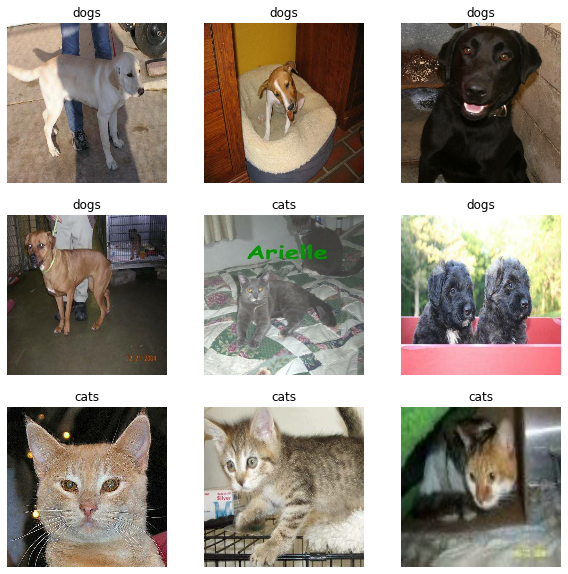

In [4]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [6]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


In [8]:
# AUTOTUNE = tf.data.AUTOTUNE # worked at macpro but not in linux
AUTOTUNE = tf.data.experimental.AUTOTUNE # use instead this in linux

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

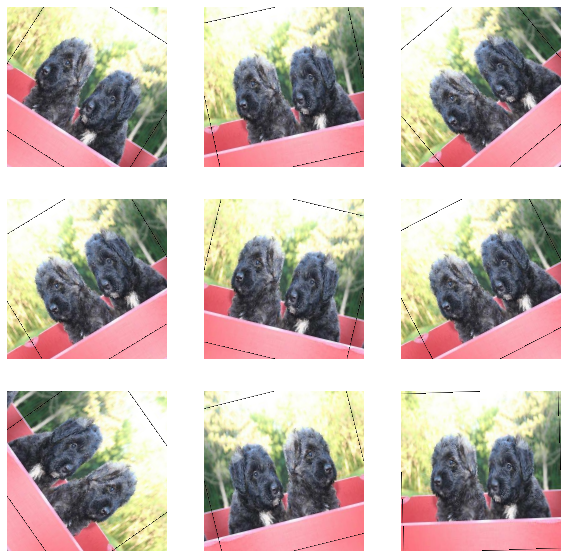

In [12]:
for image, _ in train_dataset.take(1):
      plt.figure(figsize=(10, 10))
      first_image = image[0]
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [14]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [15]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [16]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [17]:
base_model.trainable = False

In [18]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [21]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

In [24]:
len(model.trainable_variables)

2

In [25]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 13s 499ms/step - loss: 0.6817 - accuracy: 0.6027


In [26]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.68
initial accuracy: 0.60


In [27]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 17s 276ms/step - loss: 0.6675 - accuracy: 0.6205 - val_loss: 0.4765 - val_accuracy: 0.7017
Epoch 2/10
63/63 [==============================] - 5s 86ms/step - loss: 0.5310 - accuracy: 0.7180 - val_loss: 0.3542 - val_accuracy: 0.8119
Epoch 3/10
63/63 [==============================] - 5s 85ms/step - loss: 0.4178 - accuracy: 0.7960 - val_loss: 0.2810 - val_accuracy: 0.8738
Epoch 4/10
63/63 [==============================] - 5s 85ms/step - loss: 0.3647 - accuracy: 0.8285 - val_loss: 0.2295 - val_accuracy: 0.9121
Epoch 5/10
63/63 [==============================] - 5s 86ms/step - loss: 0.3207 - accuracy: 0.8560 - val_loss: 0.2009 - val_accuracy: 0.9220
Epoch 6/10
63/63 [==============================] - 5s 86ms/step - loss: 0.2834 - accuracy: 0.8770 - val_loss: 0.1786 - val_accuracy: 0.9356
Epoch 7/10
63/63 [==============================] - 5s 84ms/step - loss: 0.2570 - accuracy: 0.8905 - val_loss: 0.1531 - val_accuracy: 0.9468
Epoch 8/10


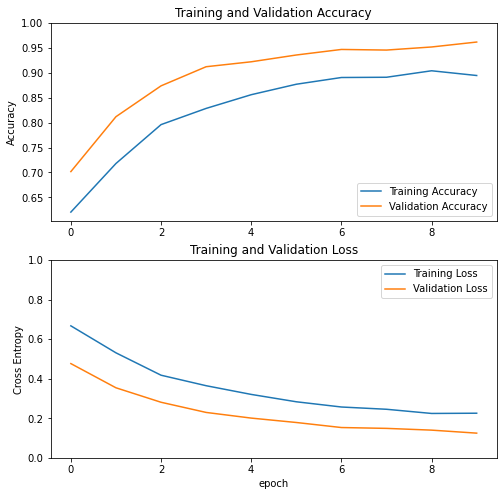

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Note: If you are wondering why the validation metrics are clearly better than 
# the training metrics, the main factor is because layers like tf.keras.layers.BatchNormalization and 
# tf.keras.layers.Dropout affect accuracy during training. They are turned off when calculating validation loss.

### Fine tuning
#### Un-freeze the top layers of the model

In [29]:
base_model.trainable = True

In [30]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [31]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

In [33]:
len(model.trainable_variables)

58

In [34]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 14s 215ms/step - loss: 0.1625 - accuracy: 0.9325 - val_loss: 0.0638 - val_accuracy: 0.9752
Epoch 11/20
63/63 [==============================] - 5s 86ms/step - loss: 0.1234 - accuracy: 0.9445 - val_loss: 0.0553 - val_accuracy: 0.9839
Epoch 12/20
63/63 [==============================] - 5s 86ms/step - loss: 0.1090 - accuracy: 0.9560 - val_loss: 0.0447 - val_accuracy: 0.9827
Epoch 13/20
63/63 [==============================] - 5s 85ms/step - loss: 0.0965 - accuracy: 0.9580 - val_loss: 0.0404 - val_accuracy: 0.9827
Epoch 14/20
63/63 [==============================] - 5s 84ms/step - loss: 0.0821 - accuracy: 0.9640 - val_loss: 0.0436 - val_accuracy: 0.9777
Epoch 15/20
63/63 [==============================] - 5s 85ms/step - loss: 0.0754 - accuracy: 0.9640 - val_loss: 0.0378 - val_accuracy: 0.9864
Epoch 16/20
63/63 [==============================] - 5s 83ms/step - loss: 0.0742 - accuracy: 0.9685 - val_loss: 0.0441 - val_accuracy: 0.9889
Epoc

In [35]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

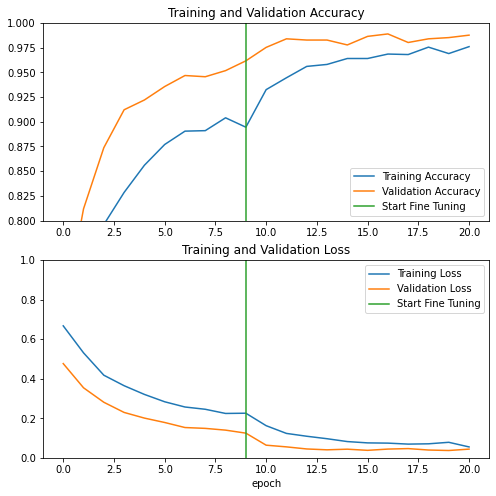

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 0s 47ms/step - loss: 0.0545 - accuracy: 0.9792
Test accuracy : 0.9791666865348816


Predictions:
 [0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0]
Labels:
 [0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0]


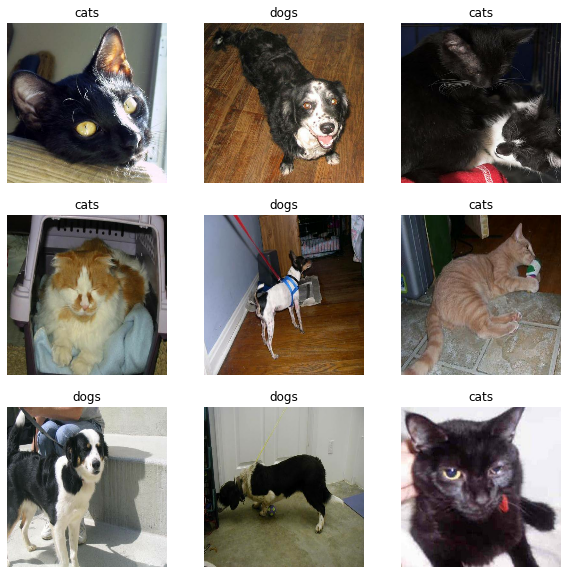

In [38]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")